# Description
in this section we analyse the meta data to see what could be done apart from directly changing our model to improve our results

**conclusion**
- Because of such unbalanced we think it might be intersting to split the data per Phylum because the task clearly state that we nee to predict the families we could implement a solution where a function looks over the Phylum in test data and with this fits the right model

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# if using colab, run this cell to import the data
from google.colab import drive
import zipfile
drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/rare_species 1.zip'
extract_path = '/content/rare_species 1'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mounted at /content/drive


In [ ]:
# With colab
folder_path = '/content/rare_species 1'
meta = pd.read_csv('/content/rare_species 1/metadata.csv')

# With vscode
# folder_path = '../data/rare_species 1'
# meta = pd.read_csv('../data/rare_species 1/metadata.csv')

meta.head()

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...


# Analysis

## Phylum

We are dealing with 11 thousand images separated into different phylum and then again seperated into different families.
the families are not well destributed across the Phylum, the majority class as nearly 8000 more images that the second highest class and the minority class as only 60 images

In [ ]:
print(f"the diferent Phyla are: \n{meta['phylum'].unique()}\n")
print(f"images per phylum :  \n{meta['phylum'].value_counts()}")

print(f"\nthere are {meta['family'].nunique()} different families")

the diferent Phyla are: 
['mollusca' 'chordata' 'arthropoda' 'echinodermata' 'cnidaria']

images per phylum :  
phylum
chordata         9952
arthropoda        951
cnidaria          810
mollusca          210
echinodermata      60
Name: count, dtype: int64

there are 202 different families


## Families

The number of family per phylum is also highly different and show a similar patern than the number of images per phylum

In [ ]:
family_phylum = meta.groupby('phylum')['family'].nunique().reset_index()
family_phylum.columns = ['phylum', 'number_of_families']

print(f"the number of family per phylum is:\n{family_phylum.sort_values(by='number_of_families', ascending=False)}")

the number of family per phylum is:
          phylum  number_of_families
1       chordata                 166
0     arthropoda                  17
2       cnidaria                  13
4       mollusca                   5
3  echinodermata                   1


echinodermata: as only one family which mean that if we build a classifier to predict based on the phylum (that should be provided on the metadata) this one will not need model

In [ ]:
# checking if there are families that are including in more than one phylum
meta.groupby('family')['phylum'].nunique().sort_values(ascending=False).head()

,phylum
family,
accipitridae,1
acipenseridae,1
acroporidae,1
agamidae,1
agariciidae,1


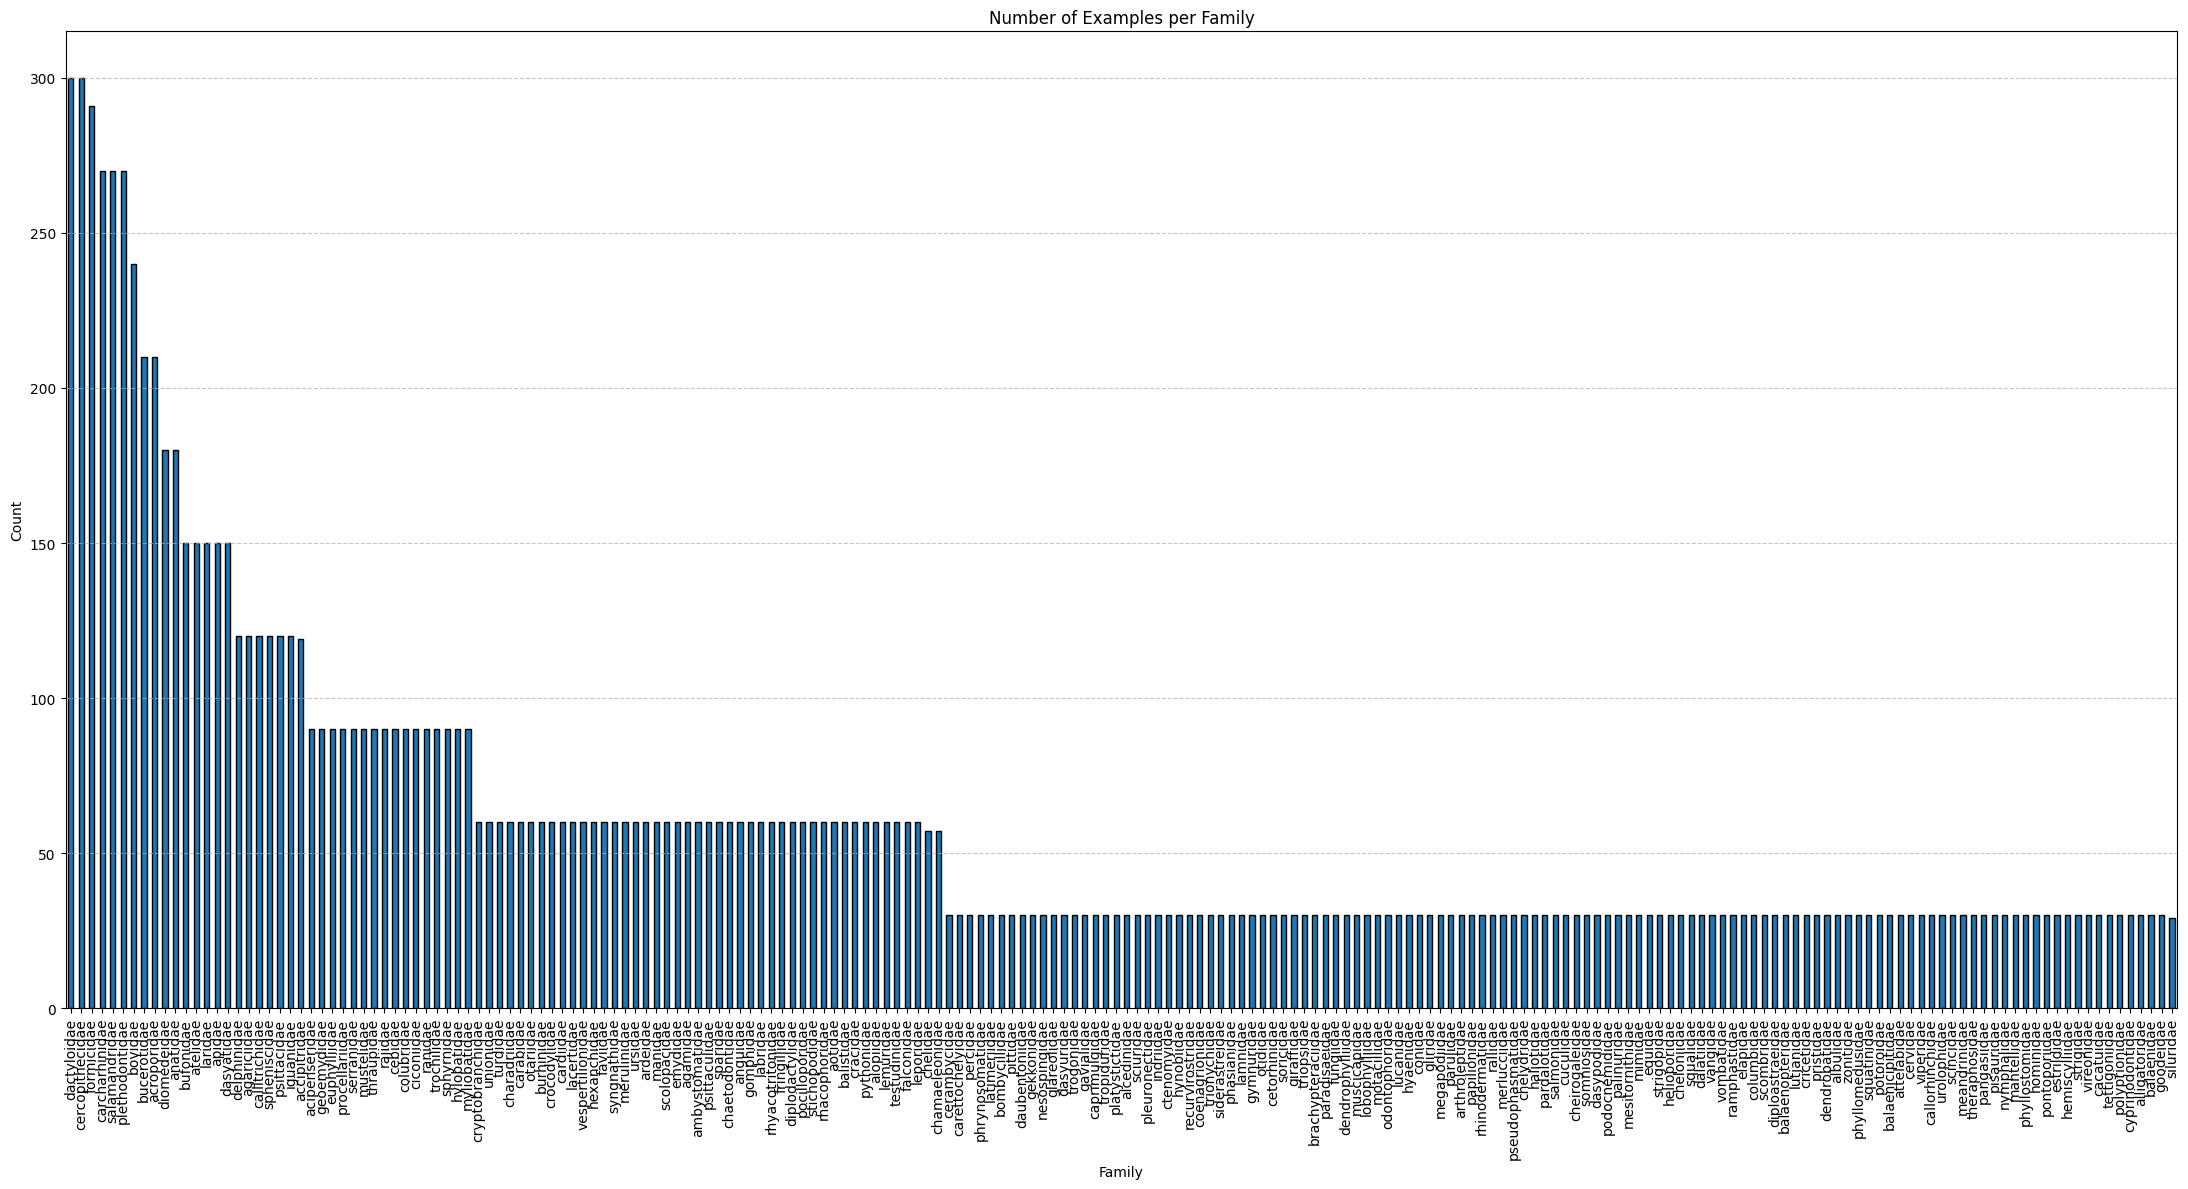

In [ ]:
family_counts = meta['family'].value_counts()

family_counts.plot(kind='bar', figsize=(22, 12), edgecolor='black')
plt.title('Number of Examples per Family')
plt.xlabel('Family')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

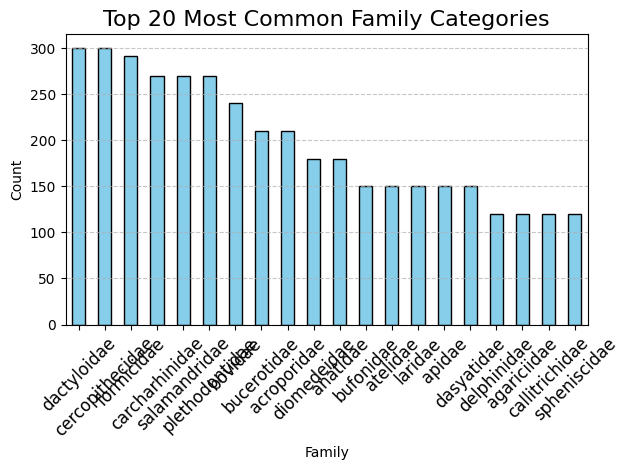

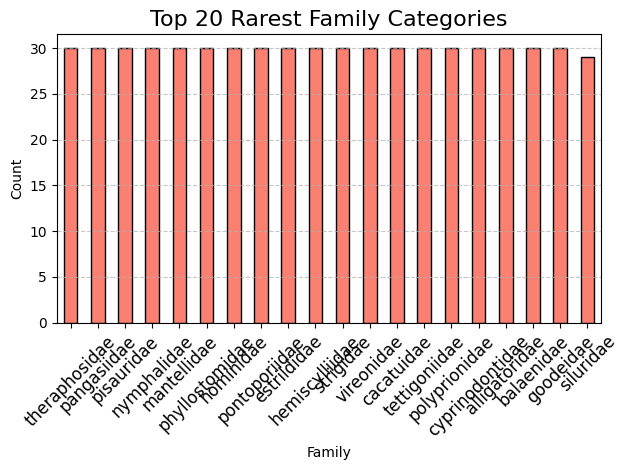

In [ ]:
#Top 20 of the rarest and most common families
top_20_common = family_counts.head(20)
top_20_rare = family_counts.tail(20)

# Plot the most common families
plt.figure()
top_20_common.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 20 Most Common Family Categories', fontsize=16)
plt.xlabel('Family')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Plot the less common families
plt.figure()
top_20_rare.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 20 Rarest Family Categories', fontsize=16)
plt.xlabel('Family')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

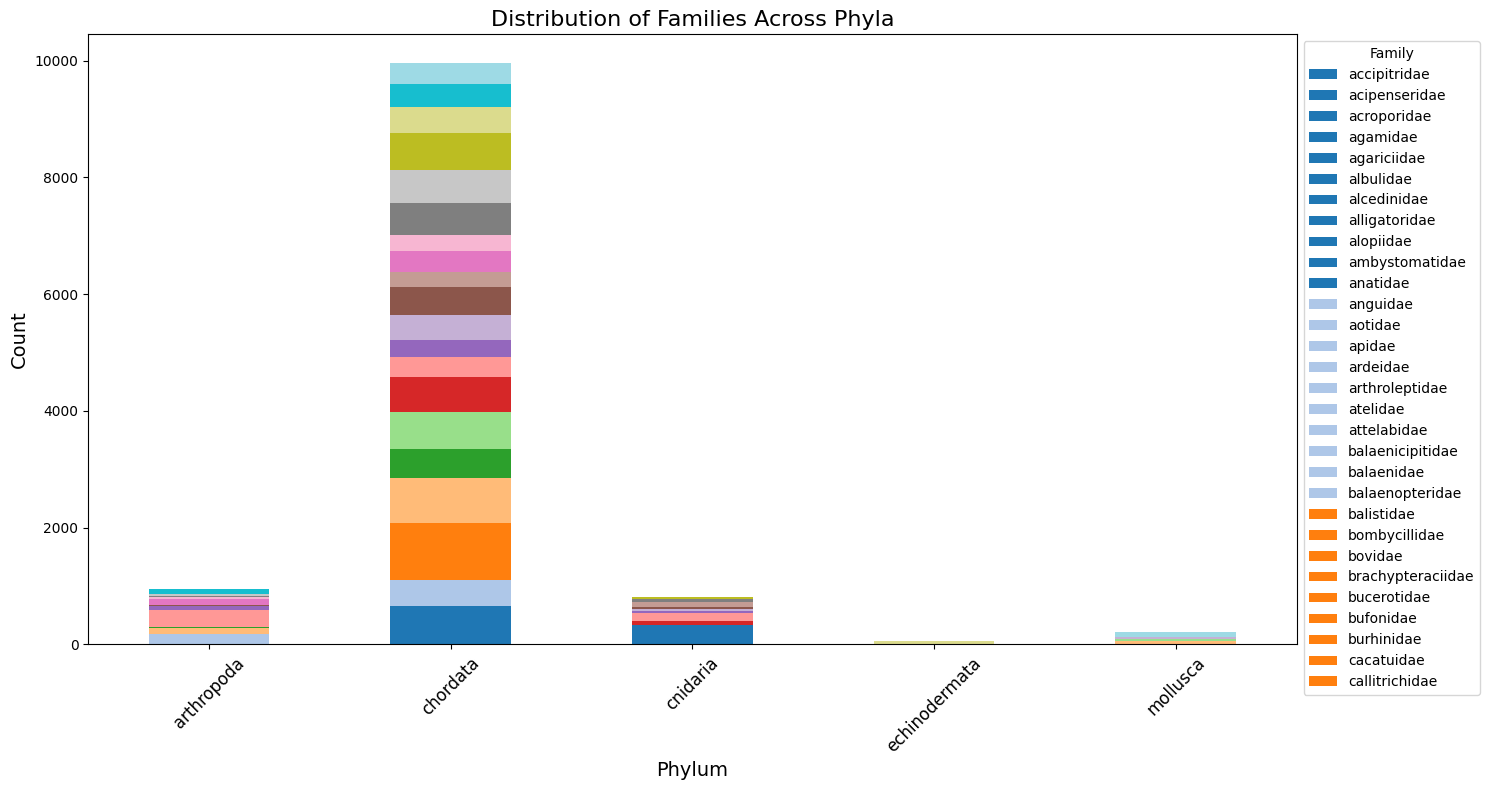

In [ ]:
phylum_family_distribution = meta.groupby(['phylum', 'family']).size().unstack(fill_value=0)
# Plots the family per Phylum and over us an idea of how the data is spread
phylum_family_distribution.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.title('Distribution of Families Across Phyla', fontsize=16)
plt.xlabel('Phylum', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Family', loc='upper left', fontsize=10)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:30], labels[:30], title='Family', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()
plt.show()